In [85]:
# data manipulation imports
import pandas as pd
import numpy as np

# data saving imports
import pickle

# custom imports
from regression_class import RedditRegression as RR
from regression_class import TimestampClass

# stats imports
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import metrics
from sklearn import feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
data = pickle.load(open('test_data_crypto_5_days.p', 'rb'))

In [4]:
regression_threads = data['regression_data']
all_data = data['all_data']

In [6]:
X_COLS = [
    "sentiment_sign",
    "sentiment_magnitude",
    "hour",
    "num_dayofweek",
    "activity_ratio",
    "mean_author_sentiment_sign",
    "mean_author_sentiment_magnitude",
    "log_author_all_activity_count",
]
y_col = "success"

In [47]:
regression_params = {
    'name': 'crypto',
    'regression_data': regression_threads,
    'thread_data': all_data,
    'regression_type': 'logistic',
    'collection_window': 2,
    'model_window': 2,
    'validation_window': 1,
    'FSS': True,
    'performance_scoring_method': 'roc_auc',
    'x_cols': X_COLS,
    'y_col': y_col,
    'metrics': ['roc_auc'],
    'activity_threshold': 2,
}

In [48]:
test_mnlogit = RR(regression_params)

In [49]:
test_mnlogit.calc_author_thread_counts()
test_mnlogit.get_regression_model_data()
test_mnlogit.get_regression_model_data(calval="val")

In [50]:
estimator = linear_model.LogisticRegression()
X = test_mnlogit.regression_model_data[test_mnlogit.regression_params["x_cols"]]
y = test_mnlogit.regression_model_data[test_mnlogit.regression_params["y_col"]],
scoring_method = test_mnlogit.regression_params["performance_scoring_method"]
tol = 0.005

In [70]:
scoring_method

'roc_auc'

In [51]:
sfs = feature_selection.SequentialFeatureSelector(estimator=estimator, tol=tol, scoring=scoring_method, n_features_to_select='auto')

In [82]:
features_selected = []
for i in range(1, len(X.columns)):
    sfs = feature_selection.SequentialFeatureSelector(estimator=estimator, n_features_to_select=i, scoring=scoring_method, cv=None)
    sfs.fit(X,np.array(y)[0])
    features_selected.append(sfs.get_feature_names_out())

In [83]:
sfs.get_params()

{'cv': None,
 'direction': 'forward',
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_features_to_select': 7,
 'n_jobs': None,
 'scoring': 'roc_auc',
 'tol': None}

In [84]:
features_selected

[array(['mean_author_sentiment_sign'], dtype=object),
 array(['num_dayofweek', 'mean_author_sentiment_sign'], dtype=object),
 array(['num_dayofweek', 'mean_author_sentiment_sign',
        'mean_author_sentiment_magnitude'], dtype=object),
 array(['num_dayofweek', 'mean_author_sentiment_sign',
        'mean_author_sentiment_magnitude', 'log_author_all_activity_count'],
       dtype=object),
 array(['sentiment_magnitude', 'num_dayofweek',
        'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude',
        'log_author_all_activity_count'], dtype=object),
 array(['sentiment_sign', 'sentiment_magnitude', 'num_dayofweek',
        'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude',
        'log_author_all_activity_count'], dtype=object),
 array(['sentiment_sign', 'sentiment_magnitude', 'num_dayofweek',
        'activity_ratio', 'mean_author_sentiment_sign',
        'mean_author_sentiment_magnitude', 'log_author_all_activity_count'],
       dtype=object)]

In [54]:
test_mnlogit.run_FSS()

c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{1: 'success ~ hour',
 2: 'success ~ hour + mean_author_sentiment_sign',
 3: 'success ~ hour + num_dayofweek + mean_author_sentiment_sign',
 4: 'success ~ hour + num_dayofweek + mean_author_sentiment_sign + mean_author_sentiment_magnitude',
 5: 'success ~ hour + num_dayofweek + mean_author_sentiment_sign + mean_author_sentiment_magnitude + log_author_all_activity_count',
 6: 'success ~ sentiment_magnitude + hour + num_dayofweek + mean_author_sentiment_sign + mean_author_sentiment_magnitude + log_author_all_activity_count',
 7: 'success ~ sentiment_sign + sentiment_magnitude + hour + num_dayofweek + mean_author_sentiment_sign + mean_author_sentiment_magnitude + log_author_all_activity_count',
 8: 'success ~ sentiment_sign + sentiment_magnitude + hour + num_dayofweek + activity_ratio + mean_author_sentiment_sign + mean_author_sentiment_magnitude + log_author_all_activity_count'}

In [55]:
test_mnlogit.get_features_from_FSS()

{1: ['hour'],
 2: ['hour', 'mean_author_sentiment_sign'],
 3: ['hour', 'num_dayofweek', 'mean_author_sentiment_sign'],
 4: ['hour',
  'num_dayofweek',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude'],
 5: ['hour',
  'num_dayofweek',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 6: ['sentiment_magnitude',
  'hour',
  'num_dayofweek',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 7: ['sentiment_sign',
  'sentiment_magnitude',
  'hour',
  'num_dayofweek',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 8: ['sentiment_sign',
  'sentiment_magnitude',
  'hour',
  'num_dayofweek',
  'activity_ratio',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count']}

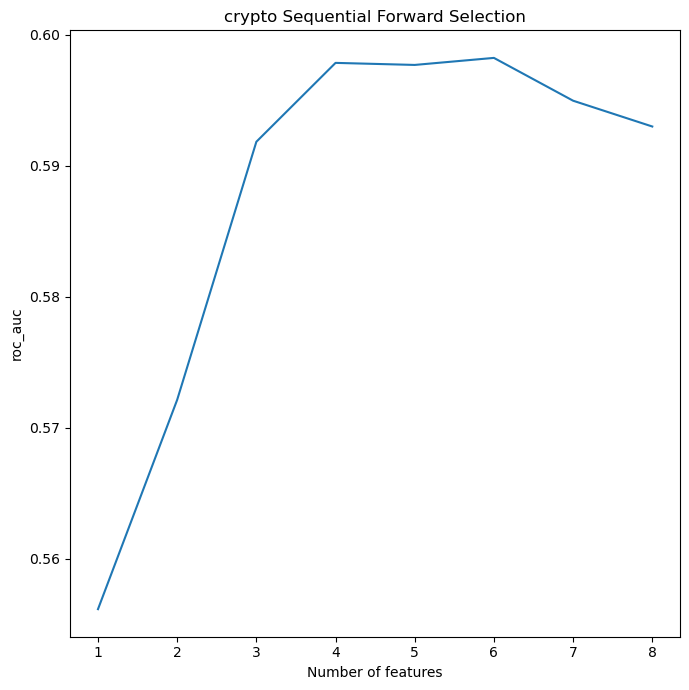

In [56]:
test_mnlogit.plot_FSS()

In [81]:
smf_mod_old = smf.logit('success ~ hour', data=test_mnlogit.regression_model_data).fit()
smf_mod_new = smf.logit('success ~ mean_author_sentiment_sign', data=test_mnlogit.regression_model_data).fit()
#smf_mod_new = smf.logit('success ~ sentiment_sign', data=test_mnlogit.regression_model_data).fit()
skl_mod_old = linear_model.LogisticRegression().fit(test_mnlogit.regression_model_data[['hour']], test_mnlogit.regression_model_data.success)
skl_mod_new = linear_model.LogisticRegression().fit(test_mnlogit.regression_model_data[['mean_author_sentiment_sign']], test_mnlogit.regression_model_data.success)

Optimization terminated successfully.
         Current function value: 0.510612
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.511229
         Iterations 5


In [80]:
y_real =  test_mnlogit.regression_model_data.success
x_column = {
    'old': 'hour',
    'new': 'mean_author_sentiment_sign'
}
def get_y_pred(module, model_fit, x_col):
    if module == 'skl':
        return model_fit.predict_proba(x_col)
    else:
        return model_fit.predict()
    
models = {
    'skl': {
        'old': skl_mod_old,
        'new': skl_mod_new,
    },
    'smf': {
        'old': smf_mod_old,
        'new': smf_mod_new,
    }
}

predicted_probs = {}
aucs = {}

for module in models:
    print(module)
    predicted_probs[module] = {}
    aucs[module] = {}
    for i in models[module]:
        print(i)
        x_vals = test_mnlogit.regression_model_data[[x_column[i]]]
        predicted_probs[module][i] = get_y_pred(module, models[module][i], x_vals)
        display(pd.DataFrame(predicted_probs[module][i]))
        if module == 'skl':
            y_pred = predicted_probs[module][i][:, 1]
        else:
            y_pred = predicted_probs[module][i]
        auc = metrics.roc_auc_score(y_real, y_pred)
        print(auc)
        aucs[module][i] = auc




skl
old


,0,1
0,0.283615,0.716385
1,0.283615,0.716385
2,0.277080,0.722920
3,0.277080,0.722920
4,0.277080,0.722920
...,...,...
362,0.162571,0.837429
363,0.162571,0.837429
364,0.158209,0.841791
365,0.158209,0.841791


0.5561352440662786
new


,0,1
0,0.219871,0.780129
1,0.252522,0.747478
2,0.252522,0.747478
3,0.190367,0.809633
4,0.190367,0.809633
...,...,...
362,0.190367,0.809633
363,0.190367,0.809633
364,0.190367,0.809633
365,0.190367,0.809633


0.5414017017465294
smf
old


,0
0,0.716349
1,0.716349
2,0.722887
3,0.722887
4,0.722887
...,...
362,0.837450
363,0.837450
364,0.841813
365,0.841813


0.5561352440662786
new


,0
0,0.791224
1,0.780516
2,0.801543
3,0.780516
4,0.791224
...,...
362,0.780516
363,0.780516
364,0.791224
365,0.791224


0.5120241827138379


In [86]:
help(SequentialFeatureSelector)

Help on class SequentialFeatureSelector in module mlxtend.feature_selection.sequential_feature_selector:

class SequentialFeatureSelector(mlxtend.utils.base_compostion._BaseXComposition, sklearn.base.MetaEstimatorMixin)
 |  SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)
 |  
 |  Sequential Feature Selection for Classification and Regression.
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  k_features : int or tuple or str (default: 1)
 |      Number of features to select,
 |      where k_features < the full feature set.
 |      New in 0.4.2: A tuple containing a min and max value can be provided,
 |          and the SFS will consider return any feature combination between
 |          min and max that scored highest in cross-validation. For example,
 |          the tuple (1, 4) will 